In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


def fitts(t, x, k, r):
    """
    ODE model for Fitts's law: dx/dt = k(r-x)
    """
    dxdt = k * (r - x)
    return dxdt

# Parameters
k = 3
r = 10
t_span = (0, 5)
x0 = [0]

# Solve the initial value problem
solution = solve_ivp(
    fun=lambda t, x: fitts(t, x, k, r),
    t_span=t_span,
    y0=x0,
    dense_output=True,
)

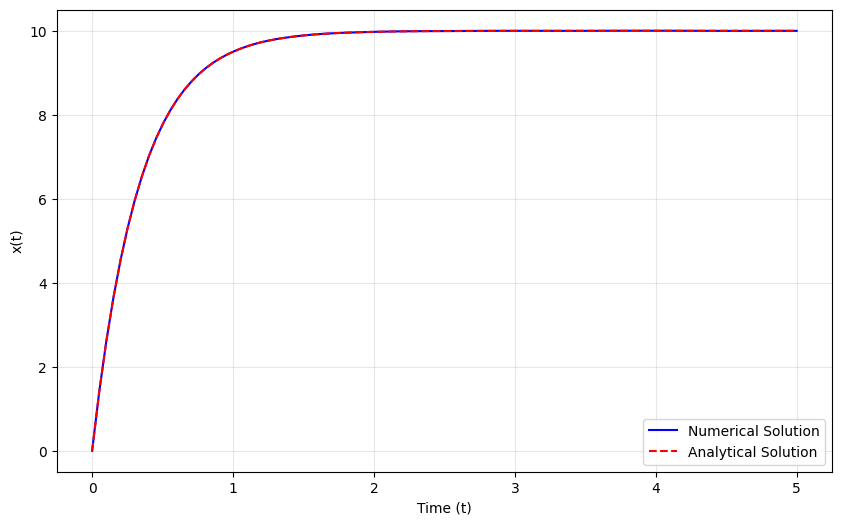

In [3]:
# Plot the solution
t = np.linspace(t_span[0], t_span[1], 100)
x_numerical = solution.sol(t)[0]

# Analytical solution for comparison
x_analytical = r * (1 - np.exp(-k * t))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, x_numerical, 'b-', label='Numerical Solution')
plt.plot(t, x_analytical, 'r--', label='Analytical Solution')
plt.grid(True, alpha=0.3)
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.legend()
plt.show()

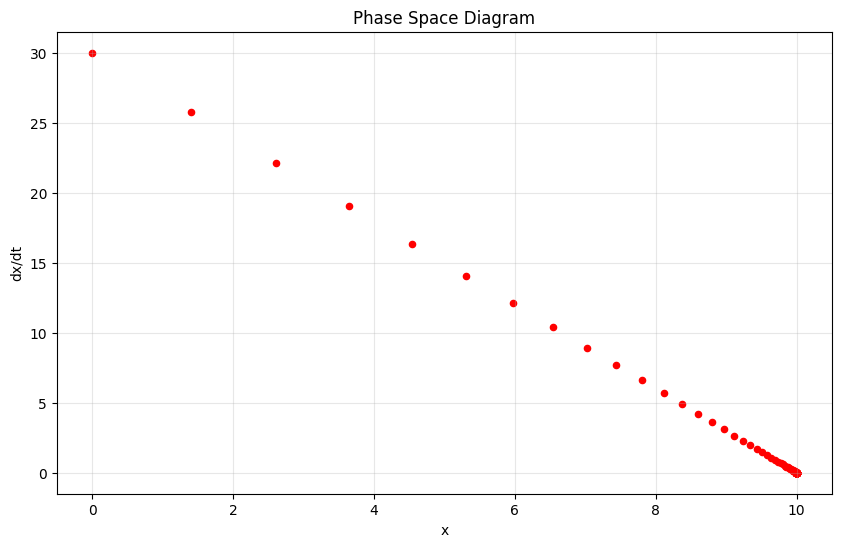

In [ ]:
# Plot a phase space diagram for the ODE
plt.figure(figsize=(10, 6))

t_points = np.linspace(t_span[0], t_span[1], 100)
x_solution = solution.sol(t_points)[0]
dx_solution = [fitts(0, x, k, r) for x in x_solution]

plt.scatter(x_solution, dx_solution, color='red', s=20)
plt.grid(True, alpha=0.3)
plt.xlabel('x')
plt.ylabel('dx/dt')
plt.title('Phase Space Diagram')
plt.show()
